## Data Set Description
* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [754]:
# importing necessasry libraries
import numpy as np
import pandas as pd
# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
# Scaling
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt
# importing sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
#Evalution Metrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report, roc_curve,confusion_matrix

In [755]:
df = pd.read_csv("C:/Users/91899/Desktop/Project 2/diabetic_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [756]:
# These are the numerical data type features
df_int = df.select_dtypes((np.number))
df_int.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [757]:
df_cat = df.select_dtypes((np.object))
df_cat.columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Missing Values Treatment

In [758]:
df = df.replace("?", np.nan)

In [759]:
nan_values = df.isna().sum()
percent_missing_values = (df.isna().sum()/df.shape[0]) * 100
total = pd.concat([nan_values, percent_missing_values], axis = 1, keys = ['Nan Values', 'Percentage Missing Values']).sort_values(by = 'Nan Values',ascending = False)
total.head(7)

,Nan Values,Percentage Missing Values
weight,98569,96.858479
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


In [760]:
df = df.drop(df[df["diag_1"].isna() == True].index, axis = 0)
df = df.drop(df[df["diag_2"].isna() == True].index, axis = 0)
df = df.drop(df[df["diag_3"].isna() == True].index, axis = 0)

In [761]:
df.shape

(100244, 50)

In [762]:
df["race"] = df["race"].fillna("Caucasian")

In [763]:
df = df.drop(["encounter_id", "weight", "payer_code", 'medical_specialty'], axis = 1, inplace = False)

In [764]:
nan_values = df.isna().sum()
percent_missing_values = (df.isna().sum()/df.shape[0]) * 100
total = pd.concat([nan_values, percent_missing_values], axis = 1, keys = ['Nan Values', 'Percentage Missing Values']).sort_values(by = 'Nan Values',ascending = False)
total.head()

,Nan Values,Percentage Missing Values
patient_nbr,0,0.0
tolazamide,0,0.0
acetohexamide,0,0.0
glipizide,0,0.0
glyburide,0,0.0


In [765]:
id_map = pd.read_csv('C:/Users/91899/Desktop/Project 2/IDs_mapping.csv')[1:]
id_map.head()

,discharge_disposition_id,admission_source_id,admission_type_id
1,Discharged to home,Physician Referral,Emergency
2,Discharged/transferred to another short term h...,Clinic Referral,Urgent
3,Discharged/transferred to SNF,HMO Referral,Elective
4,Discharged/transferred to ICF,Transfer from a hospital,Newborn
5,Discharged/transferred to another type of inpa...,Transfer from a Skilled Nursing Facility (SNF),Not Available


In [766]:
df['admission_type_id'] = df['admission_type_id'].map(id_map['admission_type_id'])
df['admission_source_id'] = df['admission_source_id'].map(id_map['admission_source_id'])
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(id_map['discharge_disposition_id'])

### Dealing with Diagnosis Columns

In [767]:
for i in df.loc[:,'diag_1':'diag_3']:
    #df[i]=df[i].fillna(0)
    df.loc[df[i].str[0].isin(['V','E']),i]=1111
    df[i]=df[i].astype(float)

In [768]:
df.loc[:, "diag_1" : "diag_3"] = df.loc[:, "diag_1" : "diag_3"].astype(float)

In [769]:
def diagnosed(x):
    if(x in range(390, 460) or x == 785):
        return "Circulatory"
    elif(x in range(460, 520) or x == 786):
        return "Respiratory"
    elif(x in range(520, 580) or x == 787):
        return "Digestive"
    elif(x in np.arange(250, 251, 0.01)):
        return "Diabetes"
    elif(x in range(800,1000)):
        return "Injury"
    elif(x in range(710,740)):
        return "Musculoskeletal"
    elif(x in range(580,630) or x == 788):
        return "Genitourinary"
    elif(x in range(140,240)):
        return "Neoplasms"
    else:
        return "Other Symptoms"
df["diag_3"] = df["diag_3"].apply(diagnosed)

In [770]:
df["diag_1"] = df["diag_1"].apply(diagnosed)
df["diag_2"] = df["diag_2"].apply(diagnosed)

In [771]:
pd.concat([df['diag_1'].value_counts(), df['diag_2'].value_counts(sort=False), df['diag_3'].value_counts(sort=False)], axis = 1)

,diag_1,diag_2,diag_3
Circulatory,30307,31801,30280
Diabetes,225,7036,12447
Digestive,9363,4143,3929
Genitourinary,5074,8348,6675
Injury,6836,2404,1943
Musculoskeletal,4858,1760,1914
Neoplasms,3390,2542,1853
Other Symptoms,25886,31345,33850
Respiratory,14305,10865,7353


In [772]:
df = df[df['gender'] != 'Unknown/Invalid']

In [773]:
df["gender"].value_counts()

Female    53922
Male      46319
Name: gender, dtype: int64

In [774]:
#Transfer
df['admission_source_id'] = np.where(df['admission_source_id'].str.contains
                                     ('Transfer'),'Transfer', df['admission_source_id'])
#Referral
df['admission_source_id'] = np.where(df['admission_source_id'].str.contains
                                     ('Referral'),'Referral', df['admission_source_id'])
#Emergency
df['admission_source_id'] = np.where(df['admission_source_id'].str.contains
                                     ('Emergency Room'),'Emergency Room', df['admission_source_id'])
#Not Available
df['admission_source_id'] = np.where(~df['admission_source_id'].str.contains
                                     ('Emergency Room|Referral|Transfer'),'Others', df['admission_source_id'])

In [775]:
#Transfer
df['discharge_disposition_id'] = np.where(df['discharge_disposition_id'].str.contains
                                          ('transferred'),'Transfer', df['discharge_disposition_id'])
#Discharged
df['discharge_disposition_id'] = np.where(df['discharge_disposition_id'].str.contains
                                          ('Discharged'),'Discharged', df['discharge_disposition_id'])
#Others
df['discharge_disposition_id'] = np.where(~df['discharge_disposition_id'].str.contains
                                          ('Transfer|Discharged'),'Others', df['discharge_disposition_id'])

In [776]:
#Replacing Not Mapped, Not Available, Trauma Center & Newborn with 'Others'
df['admission_type_id'] = np.where((df['admission_type_id'].str.contains
                                    ('Not Mapped|Not Available|Trauma Center|Newborn')),'Others', df['admission_type_id'])

In [777]:
df['admission_type_id'].value_counts()

Emergency    53230
Elective     18544
Urgent       18203
Others       10264
Name: admission_type_id, dtype: int64

In [778]:
df['discharge_disposition_id'].value_counts()

Discharged    59003
Transfer      33587
Others         7651
Name: discharge_disposition_id, dtype: int64

In [779]:
df['readmitted'].value_counts()

NO     53818
>30    35173
<30    11250
Name: readmitted, dtype: int64

### Feature Engineering

In [780]:
# As the target column is multiclass and problem statement is to predict the readmission of patients within 30 days.
# Lets convert target column to binary class.
df['readmitted'] = df['readmitted'].replace({"NO": 0, ">30": 1, "<30": 1})

In [781]:
#Adding New Column No_of_Visit
No_of_Visit = df['patient_nbr'].map(df.groupby('patient_nbr').count()['readmitted'])
df.insert(2,'No_of_Visit',No_of_Visit)

# Updating Time in Hospital based on Each Patient 
df['time_in_hospital'] = df['patient_nbr'].map(df.groupby('patient_nbr')['time_in_hospital'].median())

# Updating No of Lab Procedures based on Each Patient 
df['num_lab_procedures'] = df['patient_nbr'].map(df.groupby('patient_nbr')['num_lab_procedures'].median())

# Updating No of Procedures based on Each Patient 
df['num_procedures'] = df['patient_nbr'].map(df.groupby('patient_nbr')['num_procedures'].median())

# Updating No of Medications based on Each Patient 
df['num_medications'] = df['patient_nbr'].map(df.groupby('patient_nbr')['num_medications'].median())

# Updating No of OutPatients based on Each Patient 
df['number_outpatient'] = df['patient_nbr'].map(df.groupby('patient_nbr')['number_outpatient'].median())

# Updating No of Emergency based on Each Patient 
df['number_emergency'] = df['patient_nbr'].map(df.groupby('patient_nbr')['number_emergency'].median())

# Updating No of InPatients based on Each Patient 
df['number_inpatient'] = df['patient_nbr'].map(df.groupby('patient_nbr')['number_inpatient'].median())

# Updating No of Diagnosis based on Each Patient 
df['number_diagnoses'] = df['patient_nbr'].map(df.groupby('patient_nbr')['number_diagnoses'].median())

### Change

In [782]:
#Replacing Ch & No with 1 & 0
df['change'] = df['change'].replace({'Ch':1,'No':0})

### Max Glu serum

In [783]:
#Giving Weightage based on the Risk Level of the test
df['max_glu_serum'] = df['max_glu_serum'].replace(["None","Norm",">200", ">300"],[0,1,2,3])

# Updating Max Glu Serum based on Each Patient 
df['max_glu_serum'] = df['patient_nbr'].map(df.groupby('patient_nbr')['max_glu_serum'].median())

### A1C Result

In [784]:
#Giving Weightage based on the Risk Level of the test
df['A1Cresult'] = df['A1Cresult'].replace(["None","Norm",">7", ">8"],[0,1,2,3])

# Updating A1Cresult based on Each Patient 
df['A1Cresult'] = df['patient_nbr'].map(df.groupby('patient_nbr')['A1Cresult'].median())

### Medical Terms having same Characteristics

In [785]:
df.loc[:,'metformin':'metformin-pioglitazone'] = df.loc[:,'metformin':'metformin-pioglitazone'].replace(['No','Down','Steady','Up'],[0,1,2,3])

In [786]:
#Medicine has Ordinal Classes, We are giving Weights Accordingly.
for i in df.loc[:,'metformin':'metformin-pioglitazone']:
    df[i] = df['patient_nbr'].map(df.groupby('patient_nbr')[i].median())

### Dropping duplicates from the data

In [787]:
# dropping ALL duplicate values
df.drop_duplicates(subset ="patient_nbr", inplace = True)

In [788]:
df['readmitted'].value_counts()

0    42145
1    28268
Name: readmitted, dtype: int64

### One hot Encoding

In [789]:
# Categorical features which needs treatment
df_cat = ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']

In [790]:
# Treating categorical features by using one hot encoding technique i.e get_dummies method
encoded_cat = pd.get_dummies(df.loc[:,df_cat], drop_first = False)

In [791]:
# Dropping the categorical features
df = df.drop(df.loc[:,df_cat], axis = 1)

In [792]:
# Dealing with gender feature by replacing the value of Male by 0 and Female by 1.
df['gender'] = df['gender'].replace(['Male', 'Female'], [0,1])

In [793]:
# Dealing with age features
df["age"] = df["age"].replace({"[0-10)" : 10, '[10-20)' : 20, '[20-30)': 30, '[30-40)': 40, '[40-50)': 50, '[50-60)': 60,
       '[60-70)': 70, '[70-80)': 80, '[80-90)': 90, '[90-100)': 100})

In [794]:
df['diabetesMed'] = df['diabetesMed'].replace({'Yes':1,'No':0})

In [795]:
df1 = pd.concat([df, encoded_cat], axis = 1)

In [796]:
df1 = df1.drop("patient_nbr",axis = 1)

In [797]:
df_num = ['age', 'time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
df_int = df1.loc[:,df_num]

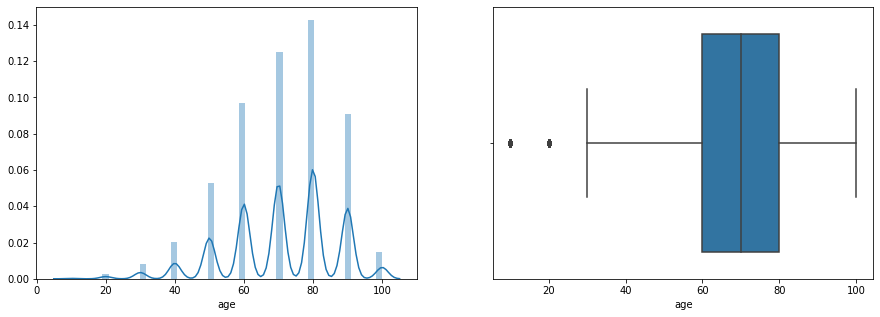

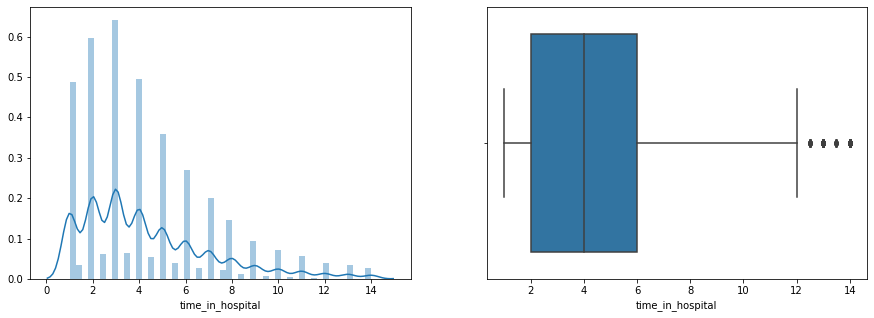

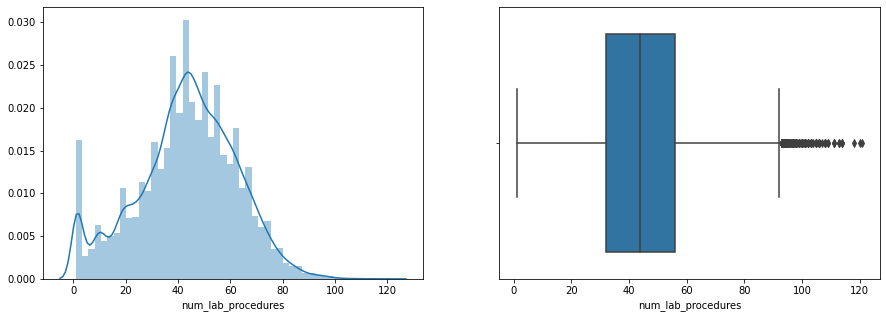

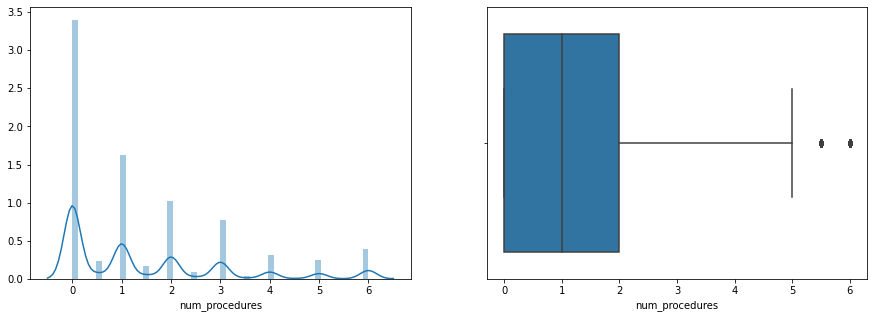

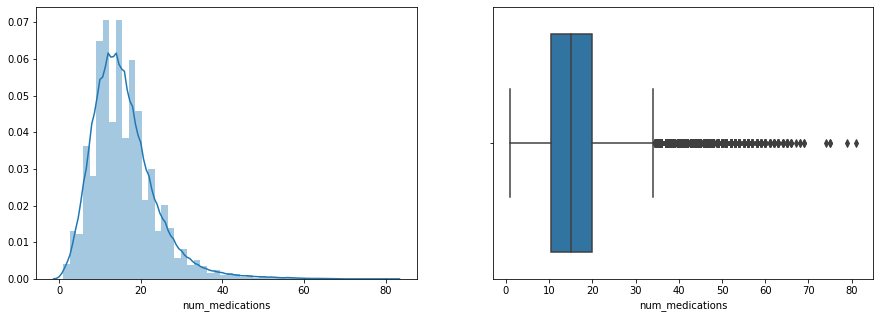

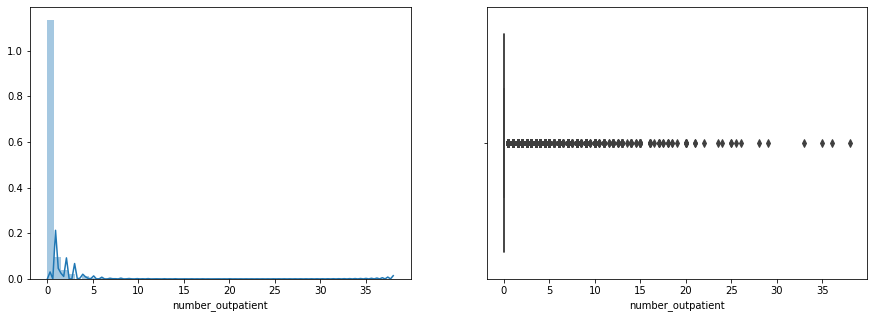

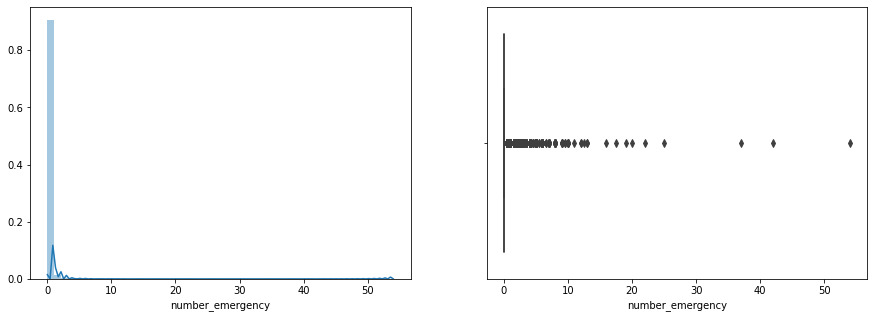

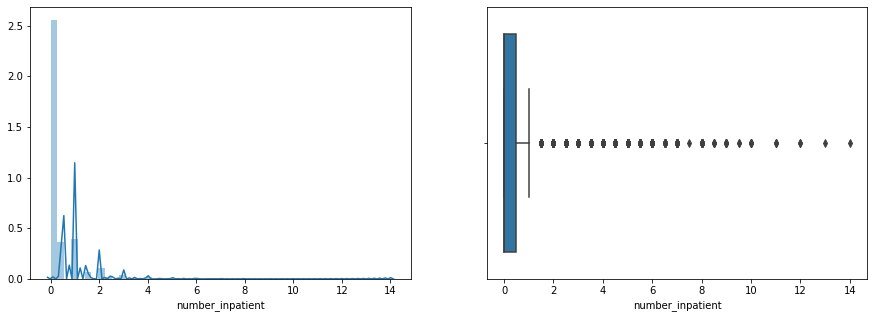

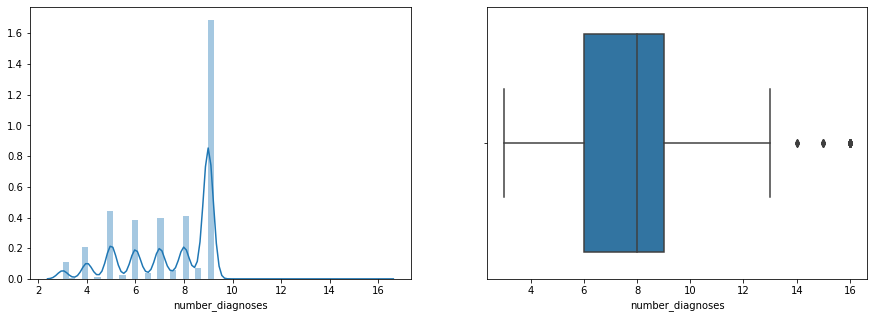

In [798]:
for plot in df_int:
    plt.figure(figsize =(15,5))
    plt.subplot(1,2,1)
    sns.distplot(df_int[plot])
    plt.subplot(1,2,2)
    sns.boxplot(df_int[plot])
    plt.show()

In [799]:
# Dealing outliers of age column
q1 = df1['age'].quantile(0.25)
q3 = df1['age'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)
df1 = df1.drop(df1[df1['age']<lower_limit].index, axis = 0)

In [800]:
# Dealing with Average time in hospital feature using log transformation
df1['time_in_hospital'] = np.log(df1['time_in_hospital'])

In [801]:
# Dealing with average number of lab procedures using Inter quantile range
q1 = df1['num_lab_procedures'].quantile(0.25)
q3 = df1['num_lab_procedures'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.7 * IQR)
lower_limit = q1 - (1.5 * IQR)
df1 = df1.drop(df1[df1['num_lab_procedures']>upper_limit].index, axis = 0)

In [802]:
# Dealing with Average number of procedures feature using square root transformation
df1['num_procedures'] = np.sqrt(df1['num_procedures'])

In [803]:
# Dealing with average number of medication using Inter quantile range
q1 = df1['num_medications'].quantile(0.25)
q3 = df1['num_medications'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (3.5 * IQR)
lower_limit = q1 - (1.5 * IQR)
df1 = df1.drop(df1[df1['num_medications']>upper_limit].index, axis = 0)

In [804]:
# Dealing with number of out patients feature.
df1 = df1.drop(df1[df1['number_outpatient'] >= 15 ].index, axis = 0)

In [805]:
# Dealing with number of emergency feature.
df1 = df1.drop(df1[df1['number_emergency'] >= 11 ].index, axis = 0)

In [806]:
# Dealing with number of inpatient feature using power transformer.
from sklearn.preprocessing import PowerTransformer
y = df1['number_inpatient']
y = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
df1['number_inpatient'] = power.fit_transform(y)

In [807]:
# Dealing with number of diagnosis feature.
df1 = df1.drop(df1[df1['number_diagnoses'] >= 14 ].index, axis = 0)

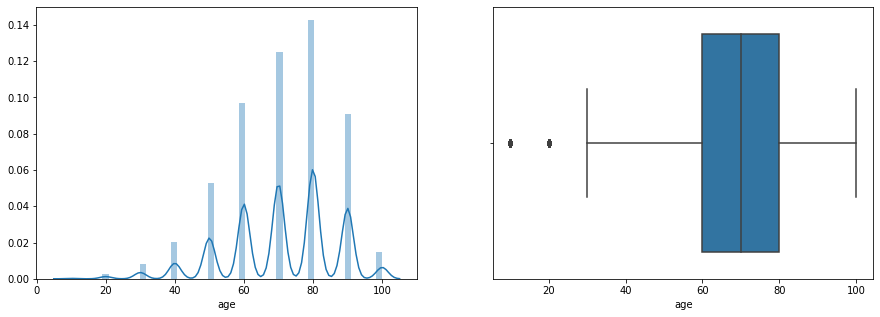

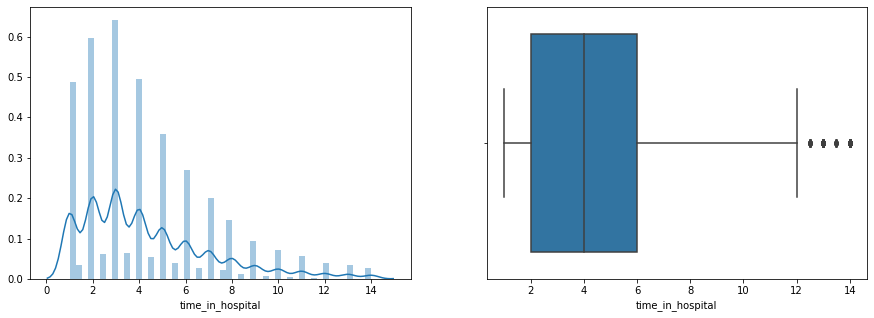

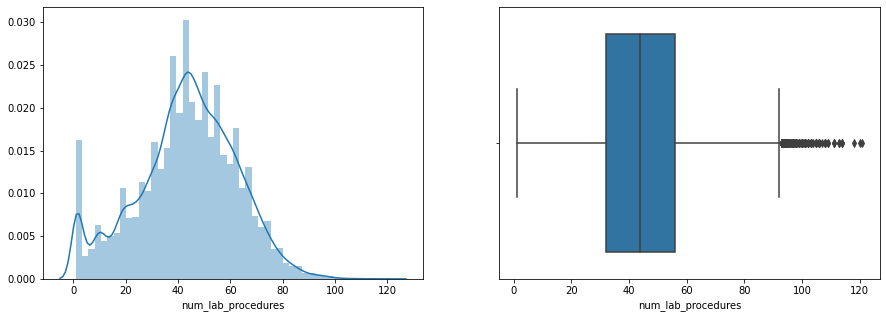

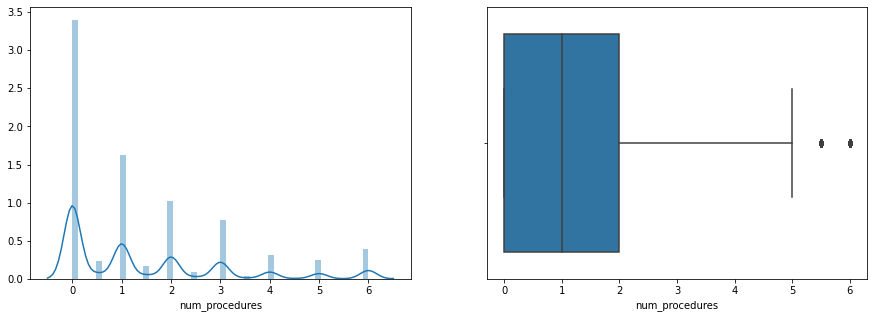

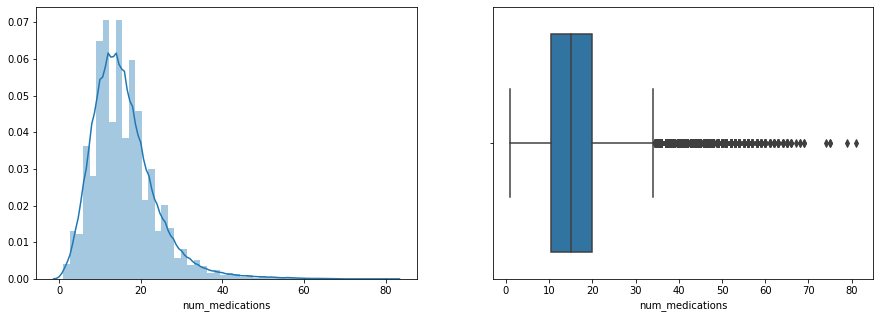

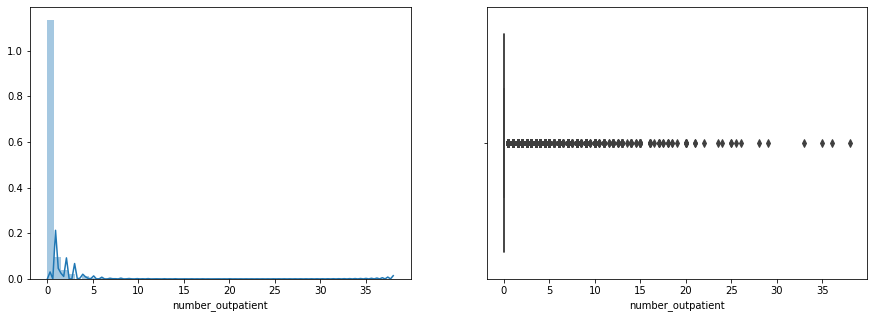

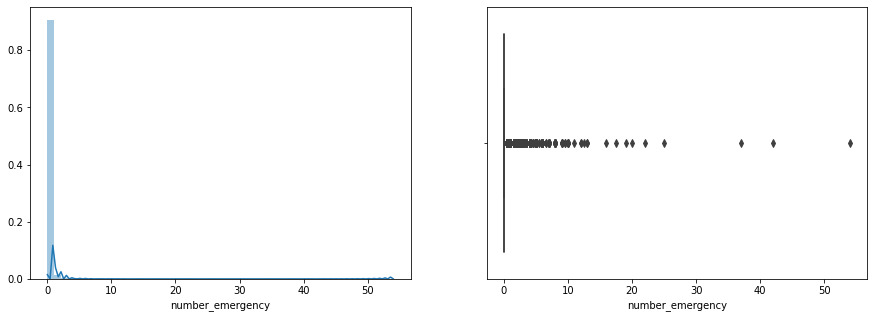

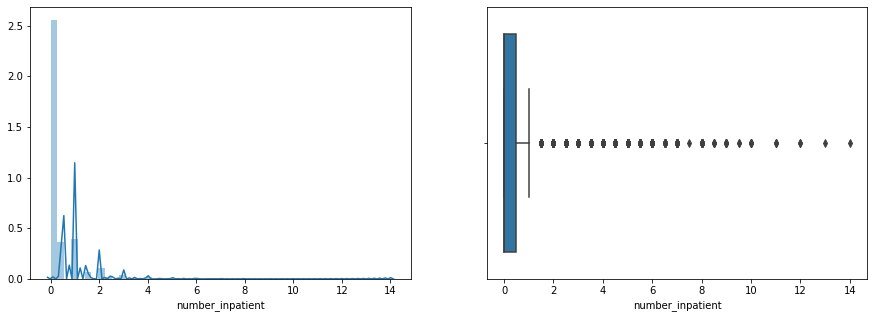

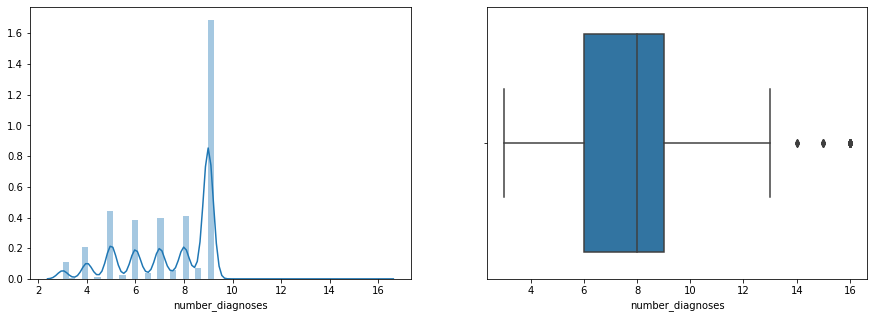

In [808]:
# After treating outliers
for plot in df_int:
    plt.figure(figsize =(15,5))
    plt.subplot(1,2,1)
    sns.distplot(df_int[plot])
    plt.subplot(1,2,2)
    sns.boxplot(df_int[plot])
    plt.show()

In [809]:
df_num = ['age', 'time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
df_int = df1.loc[:,df_num]

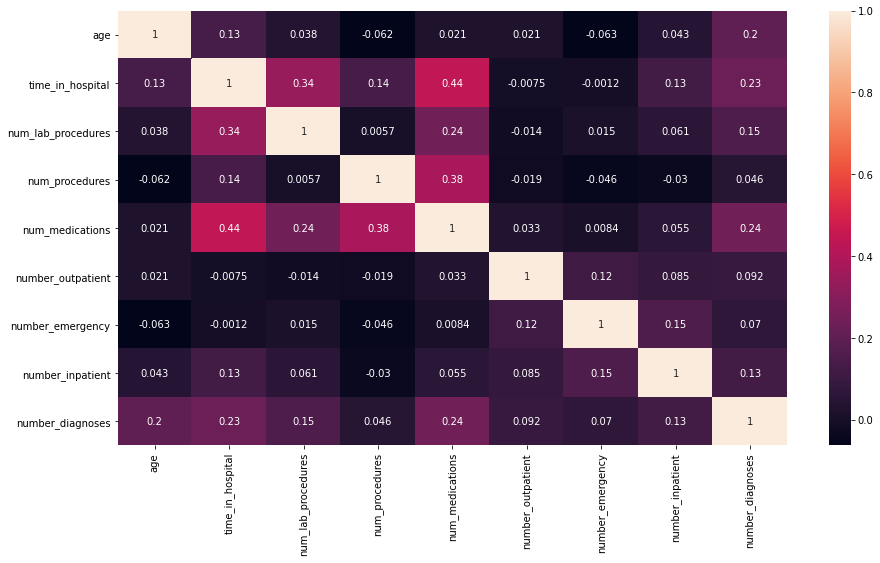

In [810]:
# finding the correlation between the numerical features.
plt.figure(figsize = (15,8))
sns.heatmap(df_int.corr(), annot = True)
plt.show()

In [811]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = df_int.columns
vif["VIF"] = [variance_inflation_factor(df_int.values, i) for i in range(df_int.shape[1])]
vif = vif.sort_values("VIF", ascending = True)
vif

,Features,VIF
7,number_inpatient,1.044368
6,number_emergency,1.107535
5,number_outpatient,1.124811
3,num_procedures,2.502651
1,time_in_hospital,5.942519
2,num_lab_procedures,6.798748
4,num_medications,7.903317
0,age,14.135536
8,number_diagnoses,16.499591


In [812]:
df_int = df_int.drop(["number_diagnoses"], axis = 1)

In [813]:
vif = pd.DataFrame()
vif["Features"] = df_int.columns
vif["VIF"] = [variance_inflation_factor(df_int.values, i) for i in range(df_int.shape[1])]
vif = vif.sort_values("VIF", ascending = True)
vif

,Features,VIF
7,number_inpatient,1.042882
6,number_emergency,1.096322
5,number_outpatient,1.117409
3,num_procedures,2.496668
1,time_in_hospital,5.904034
2,num_lab_procedures,6.530668
0,age,7.291405
4,num_medications,7.525266


In [814]:
# Significant Numerical features will be used for modelling
sig_num = ['age', 'time_in_hospital','num_lab_procedures', 'num_procedures','number_outpatient', 
           'number_emergency', 'number_inpatient', 'num_medications']

### Scaling Numerical Features

In [815]:
mms = MinMaxScaler()
df_int_scaled = mms.fit_transform(df1.loc[:, sig_num])
df_scaled = pd.DataFrame(df_int_scaled, columns = df_int.columns)

In [816]:
df_scaled.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,0.000000,0.262650,0.105263,0.912871,0.137931,0.0,0.931709,0.230769
1,0.142857,0.262650,0.452632,0.408248,0.000000,0.0,0.000000,0.288462
2,0.285714,0.000000,0.526316,0.000000,0.000000,0.0,0.000000,0.134615
3,0.428571,0.416290,0.315789,1.000000,0.000000,0.0,0.000000,0.288462
4,0.571429,0.525299,0.726316,0.408248,0.000000,0.0,0.000000,0.384615


In [817]:
df_obj = df1.drop(df_num, axis = 1)
df_cat = df_obj.drop('readmitted', axis = 1)

In [818]:
X = df_cat
y = df1["readmitted"]

In [819]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 49)

### Chi2 Test

In [820]:
# to find the significant categorical features
from sklearn.feature_selection import chi2
p_values = chi2(X_train, y_train)
data = p_values[1]
significant_features = pd.DataFrame(data, index = X.columns, columns = ["p_value"])
sig_cat = significant_features[significant_features["p_value"] < 0.05]

In [821]:
# these following features are suggested significant for modeling by chi2 test for categorical features
sig_cat

,p_value
No_of_Visit,0.000000e+00
gender,9.288505e-03
max_glu_serum,1.794659e-09
A1Cresult,4.067193e-44
metformin,6.854751e-14
repaglinide,3.774967e-11
glipizide,6.417725e-09
pioglitazone,1.957398e-04
acarbose,2.038578e-02
miglitol,7.425947e-04


In [826]:
cat_sig = df1.loc[:,sig_cat.index]
cat_sig.reset_index(inplace=True)

In [827]:
#df_scaled.reset_index(inplace=True)

In [828]:
df2 = pd.concat([df_scaled, cat_sig], axis = 1)

In [830]:
df3 = pd.concat([df2, df1['readmitted']], axis = 1)

### Model Building

In [666]:
X = df2.drop('readmitted', axis = 1)
y = df2['readmitted']

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 49)

In [668]:
X.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,No_of_Visit,gender,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,pioglitazone,acarbose,miglitol,insulin,change,diabetesMed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Elective,admission_type_id_Others,discharge_disposition_id_Discharged,discharge_disposition_id_Others,discharge_disposition_id_Transfer,admission_source_id_Emergency Room,admission_source_id_Referral,admission_source_id_Transfer,diag_1_Circulatory,diag_1_Diabetes,diag_1_Genitourinary,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_3_Circulatory,diag_3_Diabetes,diag_3_Genitourinary,diag_3_Injury,diag_3_Respiratory
0,0.000000,0.262650,0.105263,0.912871,0.137931,0.0,0.931709,0.230769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.142857,0.262650,0.452632,0.408248,0.000000,0.0,0.000000,0.288462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.285714,0.000000,0.526316,0.000000,0.000000,0.0,0.000000,0.134615,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428571,0.416290,0.315789,1.000000,0.000000,0.0,0.000000,0.288462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.571429,0.525299,0.726316,0.408248,0.000000,0.0,0.000000,0.384615,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Logistic Regression

In [ ]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)
LR_PRED = LR.predict(X_test) #Confusion matrix & Classification Report
LR_PRED_PROB = LR.predict_proba(X_test)[:,1] #ROC Curve
print('\nLogistic Regression:\n',LR.score(X_train, y_train),LR.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,LR_PRED))
print('\nClassification Report: \n',classification_report(y_test,LR_PRED))

### Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators= 1500, criterion='gini',max_depth=5,min_samples_split=4,min_samples_leaf=2,
     min_weight_fraction_leaf=0.0,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,
     min_impurity_split=None,bootstrap=True)
RF.fit(X_train,y_train) 
RF_PRED = RF.predict(X_test) #Confusion matrix & Classification Report
RF_PRED_PROB = RF.predict_proba(X_test)[:,1] #ROC Curve
print('\nRandom Forest:\n',RF.score(X_train, y_train),RF.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,RF_PRED))
print('\nClassification Report: \n',classification_report(y_test,RF_PRED))

In [ ]:
s = pd.DataFrame({"Features": X.columns , "Importance":RF.feature_importances_}, index = None).sort_values(by = 'Importance', ascending = False).head(10)

In [ ]:
plt.figure(figsize =(10,6))
sns.barplot(s['Importance'], s['Features'])
plt.xticks(rotation = 0)
plt.show()

### Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train,y_train) 
NB_PRED = NB.predict(X_test) #Confusion matrix & Clssification Report
NB_PRED_PROB = NB.predict_proba(X_test)[:,1] #ROC Curve
print('\n Naive Bayes:\n',NB.score(X_train, y_train),NB.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,NB_PRED))
print('\nClassification Report: \n',classification_report(y_test,NB_PRED))

### Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train) 
DT_PRED = DT.predict(X_test) #Confusion matrix & Clssification Report
DT_PRED_PROB = DT.predict_proba(X_test)[:,1] #ROC Curve
print('\nDecision Tree:\n',DT.score(X_train, y_train),DT.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,DT_PRED))
print('\nClassification Report: \n',classification_report(y_test,DT_PRED))

### XGBoost

In [ ]:
XG = XGBClassifier(gamma= 4,learning_rate=0.1,max_depth=7)
XG.fit(X_train,y_train) 
XG_PRED = XG.predict(X_test) #Confusion matrix & Clssification Report
XG_PRED_PROB = XG.predict_proba(X_test)[:,1] #ROC Curve
print('\nExtreme Gradient Boosting Classifier:\n',XG.score(X_train, y_train),XG.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,XG_PRED))
print('\nClassification Report: \n',classification_report(y_test,XG_PRED))

### ROC Curve and ROC-AUC Score

In [96]:
fpr_LR, tpr_LR, th_LR = roc_curve(y_test, LR_PRED_PROB)
fpr_NB, tpr_NB, th_NB = roc_curve(y_test, NB_PRED_PROB)
fpr_DT, tpr_DT, th_DT = roc_curve(y_test, DT_PRED_PROB)
fpr_RF, tpr_RF, th_RF = roc_curve(y_test, RF_PRED_PROB)
#fpr_ET, tpr_ET, th_ET = roc_curve(y_test, ET_PRED_PROB)
#fpr_BG, tpr_BG, th_BG = roc_curve(y_test, BG_PRED_PROB)
#fpr_ABC, tpr_ABC, th_ABC = roc_curve(y_test, ABC_PRED_PROB)
#fpr_GB, tpr_GB, th_GB = roc_curve(y_test, GB_PRED_PROB)
fpr_XG, tpr_XG, th_XG = roc_curve(y_test, XG_PRED_PROB)
#fpr_rf, tpr_rf, th_rf = roc_curve(y_test, RF_PRED_PROB1)
#fpr_xg, tpr_xg, th_xg = roc_curve(y_test, XG_PRED_PROB12)

plt.figure(figsize=(12,6))
plt.plot(fpr_LR, tpr_LR,label = 'Logistic Regression')
plt.plot(fpr_NB, tpr_NB,label = 'Naive Bayes')
plt.plot(fpr_DT, tpr_DT,label = 'Decision Tree')
plt.plot(fpr_RF, tpr_RF,label = 'Random Forest')
plt.plot(fpr_XG, tpr_XG,label = 'XG Boost')
#plt.plot(fpr_rf, tpr_rf,label = 'Tuned Rf')
#plt.plot(fpr_xg, tpr_xg,label = 'XG Boost Tuned')


plt.plot([0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend()
plt.show()
print('Logistic Regression: ',roc_auc_score(y_test,NB_PRED_PROB))
print('Naive Bayes        : ',roc_auc_score(y_test,RF_PRED_PROB))
print('Decision Tree      : ',roc_auc_score(y_test,DT_PRED_PROB))
print('Random Forest      : ',roc_auc_score(y_test,LR_PRED_PROB))
#print('Extra Tree         : ',roc_auc_score(y_test,LR_PRED_PROB))
#print('Bagging            : ',roc_auc_score(y_test,BG_PRED_PROB))
#print('Adaboost           : ',roc_auc_score(y_test,ABC_PRED_PROB))
#print('Gradient Boost     : ',roc_auc_score(y_test,GB_PRED_PROB))
print('XG Boost           : ',roc_auc_score(y_test,XG_PRED_PROB))
#print('RF tuned Boost     : ',roc_auc_score(y_test,RF_PRED_PROB1))
#print('XG tuned Boost     : ',roc_auc_score(y_test,XG_PRED_PROB12))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').